In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('C:/Users/1/Documents/Project/New_data/new_df_director.xlsx', index = False)

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)

# make X_train and Y_train

copy_train_set = train_set.copy()
copy_train_set['ln_Budget'] = np.log(copy_train_set['Budget'])

attributes = (
    [
#         "Len_genres",
        "Len_country",
        "ln_Budget", 
#         "Len_production_co", 
        "Run_time",
#         "Age_rating",
        "Ex_year_writer",
        "Ex_year_director"
    ]
)

scaler = StandardScaler()
sample_for_predict = copy_train_set[attributes]
scaler.fit(sample_for_predict)
X_train = scaler.transform(sample_for_predict)

condition = (
    [
#         (copy_train_set['Number_of_who_rated'] > 2000)
        (copy_train_set['Imdb_rating'] > 7.5)
    ]
)
choice = [1]
y_train = np.select(condition, choice)

# make X_test and Y_test

copy_test_set = test_set.copy()
copy_test_set['ln_Budget'] = np.log(copy_test_set['Budget'])
sample_for_test = copy_test_set[attributes]
scaler.fit(sample_for_test)
X_test = scaler.transform(sample_for_test)

condition = (
    [
#         (copy_test_set['Number_of_who_rated'] > 2000)
        (copy_test_set['Imdb_rating'] > 7.5)
    ]
)
y_test = np.select(condition, choice)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:61: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


  0%|          | 0/290 [00:00<?, ?it/s]

10
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


11
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  1%|          | 2/290 [00:00<00:22, 12.58it/s]

12
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


13
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  1%|▏         | 4/290 [00:00<00:24, 11.63it/s]

14
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  2%|▏         | 5/290 [00:00<00:29,  9.54it/s]

15
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


16
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  2%|▏         | 7/290 [00:00<00:28,  9.90it/s]

17
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  3%|▎         | 8/290 [00:00<00:28,  9.90it/s]

18
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  3%|▎         | 9/290 [00:00<00:30,  9.32it/s]

19
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  3%|▎         | 10/290 [00:01<00:30,  9.05it/s]

20
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  4%|▍         | 11/290 [00:01<00:31,  8.89it/s]

21
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  4%|▍         | 12/290 [00:01<00:31,  8.95it/s]

22
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  4%|▍         | 13/290 [00:01<00:32,  8.47it/s]

23
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  5%|▍         | 14/290 [00:01<00:45,  6.05it/s]

24
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  5%|▌         | 15/290 [00:01<00:41,  6.60it/s]

25
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  6%|▌         | 16/290 [00:01<00:43,  6.33it/s]

26
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  6%|▌         | 17/290 [00:02<00:42,  6.38it/s]

27
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  6%|▌         | 18/290 [00:02<00:43,  6.31it/s]

28
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  7%|▋         | 19/290 [00:02<00:40,  6.73it/s]

29
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  7%|▋         | 20/290 [00:02<00:38,  7.09it/s]

30
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  7%|▋         | 21/290 [00:02<00:48,  5.59it/s]

31
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 22/290 [00:02<00:46,  5.77it/s]

32
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 23/290 [00:03<00:44,  6.06it/s]

33
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 24/290 [00:03<00:41,  6.40it/s]

34
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  9%|▊         | 25/290 [00:03<00:40,  6.59it/s]

35
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  9%|▉         | 26/290 [00:03<00:39,  6.62it/s]

36
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  9%|▉         | 27/290 [00:03<00:38,  6.75it/s]

37
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|▉         | 28/290 [00:03<00:38,  6.78it/s]

38
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|█         | 29/290 [00:04<00:41,  6.25it/s]

39
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|█         | 30/290 [00:04<00:41,  6.28it/s]

40
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 11%|█         | 31/290 [00:04<00:41,  6.26it/s]

41
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 11%|█         | 32/290 [00:04<00:40,  6.35it/s]

42
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 11%|█▏        | 33/290 [00:04<00:40,  6.36it/s]

43
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▏        | 34/290 [00:04<00:40,  6.37it/s]

44
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▏        | 35/290 [00:04<00:40,  6.36it/s]

45
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▏        | 36/290 [00:05<00:43,  5.81it/s]

46
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 13%|█▎        | 37/290 [00:05<00:43,  5.82it/s]

47
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 13%|█▎        | 38/290 [00:05<00:43,  5.75it/s]

48
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 13%|█▎        | 39/290 [00:05<00:43,  5.76it/s]

49
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▍        | 40/290 [00:05<00:43,  5.77it/s]

50
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▍        | 41/290 [00:06<00:42,  5.90it/s]

51
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▍        | 42/290 [00:06<00:44,  5.60it/s]

52
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 15%|█▍        | 43/290 [00:06<00:49,  5.02it/s]

53
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 15%|█▌        | 44/290 [00:06<00:50,  4.86it/s]

54
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▌        | 45/290 [00:06<00:52,  4.68it/s]

55
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▌        | 46/290 [00:07<01:00,  4.05it/s]

56
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▌        | 47/290 [00:07<00:58,  4.16it/s]

57
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 17%|█▋        | 48/290 [00:07<00:54,  4.40it/s]

58
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 17%|█▋        | 49/290 [00:07<00:59,  4.03it/s]

59
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 17%|█▋        | 50/290 [00:08<00:55,  4.34it/s]

60
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 51/290 [00:08<00:53,  4.45it/s]

61
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 52/290 [00:08<01:01,  3.89it/s]

62
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 53/290 [00:08<00:58,  4.04it/s]

63
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 19%|█▊        | 54/290 [00:09<00:55,  4.28it/s]

64
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 19%|█▉        | 55/290 [00:09<00:53,  4.40it/s]

65
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 19%|█▉        | 56/290 [00:09<00:53,  4.34it/s]

66
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|█▉        | 57/290 [00:09<00:51,  4.50it/s]

67
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|██        | 58/290 [00:09<00:51,  4.49it/s]

68
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|██        | 59/290 [00:10<00:50,  4.54it/s]

69
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 21%|██        | 60/290 [00:10<00:59,  3.88it/s]

70
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 21%|██        | 61/290 [00:10<00:59,  3.82it/s]

71
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 21%|██▏       | 62/290 [00:11<00:57,  3.93it/s]

72
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▏       | 63/290 [00:11<00:56,  4.01it/s]

73
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▏       | 64/290 [00:11<00:55,  4.10it/s]

74
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▏       | 65/290 [00:11<01:09,  3.22it/s]

75
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 23%|██▎       | 66/290 [00:12<01:04,  3.47it/s]

76
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 23%|██▎       | 67/290 [00:12<01:01,  3.65it/s]

77
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 23%|██▎       | 68/290 [00:12<00:57,  3.85it/s]

78
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▍       | 69/290 [00:12<00:59,  3.74it/s]

79
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▍       | 70/290 [00:13<00:56,  3.87it/s]

80
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▍       | 71/290 [00:13<00:55,  3.91it/s]

81
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 25%|██▍       | 72/290 [00:13<00:54,  4.02it/s]

82
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 25%|██▌       | 73/290 [00:13<00:56,  3.83it/s]

83
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▌       | 74/290 [00:14<00:56,  3.84it/s]

84
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▌       | 75/290 [00:14<00:56,  3.80it/s]

85
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▌       | 76/290 [00:14<01:05,  3.27it/s]

86
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 27%|██▋       | 77/290 [00:15<01:07,  3.18it/s]

87
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 27%|██▋       | 78/290 [00:15<01:04,  3.28it/s]

88
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 27%|██▋       | 79/290 [00:15<01:09,  3.03it/s]

89
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 80/290 [00:16<01:39,  2.11it/s]

90
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 81/290 [00:17<01:40,  2.07it/s]

91
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 82/290 [00:17<01:42,  2.03it/s]

92
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 29%|██▊       | 83/290 [00:18<01:34,  2.19it/s]

93
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 29%|██▉       | 84/290 [00:18<01:33,  2.19it/s]

94
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 29%|██▉       | 85/290 [00:18<01:24,  2.43it/s]

95
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|██▉       | 86/290 [00:19<01:17,  2.65it/s]

96
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|███       | 87/290 [00:19<01:12,  2.81it/s]

97
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|███       | 88/290 [00:19<01:14,  2.72it/s]

98
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 31%|███       | 89/290 [00:20<01:13,  2.75it/s]

99
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 31%|███       | 90/290 [00:20<01:12,  2.75it/s]

100
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 31%|███▏      | 91/290 [00:21<01:34,  2.12it/s]

101
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▏      | 92/290 [00:21<01:25,  2.32it/s]

102
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▏      | 93/290 [00:22<01:24,  2.33it/s]

103
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▏      | 94/290 [00:22<01:16,  2.55it/s]

104
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 33%|███▎      | 95/290 [00:22<01:11,  2.71it/s]

105
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 33%|███▎      | 96/290 [00:23<01:09,  2.80it/s]

106
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 33%|███▎      | 97/290 [00:23<01:09,  2.76it/s]

107
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▍      | 98/290 [00:23<01:07,  2.85it/s]

108
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▍      | 99/290 [00:24<01:06,  2.86it/s]

109
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▍      | 100/290 [00:24<01:08,  2.79it/s]

110
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 35%|███▍      | 101/290 [00:24<01:05,  2.87it/s]

111
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 35%|███▌      | 102/290 [00:25<01:09,  2.69it/s]

112
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▌      | 103/290 [00:25<01:12,  2.59it/s]

113
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▌      | 104/290 [00:26<01:18,  2.36it/s]

114
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▌      | 105/290 [00:26<01:22,  2.25it/s]

115
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 37%|███▋      | 106/290 [00:26<01:16,  2.40it/s]

116
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 37%|███▋      | 107/290 [00:27<01:12,  2.53it/s]

117
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 37%|███▋      | 108/290 [00:27<01:17,  2.33it/s]

118
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 109/290 [00:28<01:15,  2.39it/s]

119
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 110/290 [00:28<01:16,  2.35it/s]

120
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 111/290 [00:29<01:19,  2.26it/s]

121
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 39%|███▊      | 112/290 [00:29<01:16,  2.32it/s]

122
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 39%|███▉      | 113/290 [00:30<01:20,  2.21it/s]

123
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 39%|███▉      | 114/290 [00:30<01:15,  2.34it/s]

124
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|███▉      | 115/290 [00:30<01:15,  2.32it/s]

125
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|████      | 116/290 [00:31<01:34,  1.84it/s]

126
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|████      | 117/290 [00:32<01:33,  1.85it/s]

127
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 41%|████      | 118/290 [00:32<01:38,  1.76it/s]

128
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 41%|████      | 119/290 [00:33<01:30,  1.88it/s]

129
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 41%|████▏     | 120/290 [00:33<01:26,  1.98it/s]

130
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▏     | 121/290 [00:34<01:19,  2.13it/s]

131
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▏     | 122/290 [00:34<01:17,  2.18it/s]

132
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▏     | 123/290 [00:34<01:11,  2.32it/s]

133
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 43%|████▎     | 124/290 [00:35<01:08,  2.43it/s]

134
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 43%|████▎     | 125/290 [00:35<01:07,  2.44it/s]

135
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 43%|████▎     | 126/290 [00:36<01:05,  2.52it/s]

136
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▍     | 127/290 [00:36<01:04,  2.53it/s]

137
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▍     | 128/290 [00:36<01:04,  2.49it/s]

138
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▍     | 129/290 [00:37<01:04,  2.51it/s]

139
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 45%|████▍     | 130/290 [00:37<01:03,  2.51it/s]

140
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 45%|████▌     | 131/290 [00:38<01:03,  2.50it/s]

141
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▌     | 132/290 [00:38<01:03,  2.50it/s]

142
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▌     | 133/290 [00:38<01:03,  2.46it/s]

143
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▌     | 134/290 [00:39<01:03,  2.45it/s]

144
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 47%|████▋     | 135/290 [00:39<01:01,  2.52it/s]

145
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 47%|████▋     | 136/290 [00:40<01:03,  2.43it/s]

146
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 47%|████▋     | 137/290 [00:40<01:01,  2.48it/s]

147
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 138/290 [00:40<01:01,  2.46it/s]

148
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 139/290 [00:41<01:03,  2.39it/s]

149
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 140/290 [00:41<01:02,  2.42it/s]

150
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 49%|████▊     | 141/290 [00:42<01:06,  2.23it/s]

151
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 49%|████▉     | 142/290 [00:42<01:06,  2.21it/s]

152
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 49%|████▉     | 143/290 [00:43<01:05,  2.24it/s]

153
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|████▉     | 144/290 [00:43<01:04,  2.27it/s]

154
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|█████     | 145/290 [00:44<01:02,  2.33it/s]

155
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|█████     | 146/290 [00:44<01:02,  2.30it/s]

156
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 51%|█████     | 147/290 [00:44<01:01,  2.32it/s]

157
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 51%|█████     | 148/290 [00:45<01:00,  2.34it/s]

158
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 51%|█████▏    | 149/290 [00:45<01:04,  2.19it/s]

159
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▏    | 150/290 [00:46<01:16,  1.83it/s]

160
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▏    | 151/290 [00:47<01:13,  1.89it/s]

161
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▏    | 152/290 [00:47<01:10,  1.95it/s]

162
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 53%|█████▎    | 153/290 [00:48<01:46,  1.29it/s]

163
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 53%|█████▎    | 154/290 [00:49<01:45,  1.30it/s]

164
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 53%|█████▎    | 155/290 [00:50<01:47,  1.25it/s]

165
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 54%|█████▍    | 156/290 [00:51<01:46,  1.26it/s]

166
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 54%|█████▍    | 157/290 [00:51<01:35,  1.40it/s]

167
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 54%|█████▍    | 158/290 [00:52<01:32,  1.42it/s]

168
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 55%|█████▍    | 159/290 [00:53<01:22,  1.58it/s]

169
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 55%|█████▌    | 160/290 [00:53<01:17,  1.68it/s]

170
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▌    | 161/290 [00:54<01:13,  1.77it/s]

171
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▌    | 162/290 [00:54<01:10,  1.80it/s]

172
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▌    | 163/290 [00:55<01:07,  1.88it/s]

173
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 57%|█████▋    | 164/290 [00:55<01:05,  1.93it/s]

174
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 57%|█████▋    | 165/290 [00:56<01:04,  1.94it/s]

175
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 57%|█████▋    | 166/290 [00:56<01:04,  1.94it/s]

176
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 58%|█████▊    | 167/290 [00:57<01:09,  1.76it/s]

177
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 58%|█████▊    | 168/290 [00:57<01:10,  1.72it/s]

178
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 58%|█████▊    | 169/290 [00:58<01:12,  1.68it/s]

179
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 59%|█████▊    | 170/290 [00:59<01:25,  1.40it/s]

180
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 59%|█████▉    | 171/290 [01:00<01:41,  1.17it/s]

181
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 59%|█████▉    | 172/290 [01:01<01:29,  1.31it/s]

182
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|█████▉    | 173/290 [01:01<01:29,  1.31it/s]

183
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|██████    | 174/290 [01:02<01:21,  1.42it/s]

184
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|██████    | 175/290 [01:03<01:14,  1.55it/s]

185
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 61%|██████    | 176/290 [01:03<01:08,  1.66it/s]

186
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 61%|██████    | 177/290 [01:04<01:06,  1.71it/s]

187
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 61%|██████▏   | 178/290 [01:04<01:08,  1.63it/s]

188
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▏   | 179/290 [01:05<01:06,  1.68it/s]

189
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▏   | 180/290 [01:05<01:06,  1.65it/s]

190
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▏   | 181/290 [01:06<01:02,  1.75it/s]

191
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 63%|██████▎   | 182/290 [01:06<01:01,  1.76it/s]

192
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 63%|██████▎   | 183/290 [01:07<00:58,  1.83it/s]

193
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 63%|██████▎   | 184/290 [01:08<00:56,  1.86it/s]

194
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▍   | 185/290 [01:08<00:54,  1.91it/s]

195
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▍   | 186/290 [01:09<00:53,  1.93it/s]

196
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▍   | 187/290 [01:09<00:53,  1.91it/s]

197
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 65%|██████▍   | 188/290 [01:10<00:52,  1.93it/s]

198
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 65%|██████▌   | 189/290 [01:10<00:53,  1.90it/s]

199
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▌   | 190/290 [01:11<00:53,  1.87it/s]

200
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▌   | 191/290 [01:11<00:53,  1.85it/s]

201
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▌   | 192/290 [01:12<00:59,  1.66it/s]

202
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 67%|██████▋   | 193/290 [01:13<00:59,  1.62it/s]

203
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 67%|██████▋   | 194/290 [01:13<00:58,  1.65it/s]

204
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 67%|██████▋   | 195/290 [01:14<00:56,  1.67it/s]

205
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 196/290 [01:14<00:55,  1.68it/s]

206
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 197/290 [01:15<00:54,  1.70it/s]

207
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 198/290 [01:15<00:53,  1.73it/s]

208
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 69%|██████▊   | 199/290 [01:16<00:52,  1.73it/s]

209
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 69%|██████▉   | 200/290 [01:17<00:52,  1.72it/s]

210
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 69%|██████▉   | 201/290 [01:17<00:55,  1.59it/s]

211
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|██████▉   | 202/290 [01:18<00:53,  1.66it/s]

212
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|███████   | 203/290 [01:19<00:58,  1.49it/s]

213
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|███████   | 204/290 [01:20<01:00,  1.42it/s]

214
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 71%|███████   | 205/290 [01:20<01:00,  1.41it/s]

215
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 71%|███████   | 206/290 [01:21<01:06,  1.26it/s]

216
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 71%|███████▏  | 207/290 [01:22<01:07,  1.22it/s]

217
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▏  | 208/290 [01:23<01:02,  1.32it/s]

218
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▏  | 209/290 [01:23<00:57,  1.41it/s]

219
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▏  | 210/290 [01:24<00:58,  1.38it/s]

220
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 73%|███████▎  | 211/290 [01:25<00:57,  1.37it/s]

221
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 73%|███████▎  | 212/290 [01:26<01:02,  1.25it/s]

222
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 73%|███████▎  | 213/290 [01:27<01:03,  1.21it/s]

223
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▍  | 214/290 [01:28<01:06,  1.14it/s]

224
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▍  | 215/290 [01:29<01:14,  1.01it/s]

225
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▍  | 216/290 [01:30<01:15,  1.02s/it]

226
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 75%|███████▍  | 217/290 [01:31<01:11,  1.01it/s]

227
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 75%|███████▌  | 218/290 [01:32<01:07,  1.07it/s]

228
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▌  | 219/290 [01:33<01:10,  1.01it/s]

229
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▌  | 220/290 [01:34<01:08,  1.02it/s]

230
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▌  | 221/290 [01:35<01:05,  1.05it/s]

231
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 77%|███████▋  | 222/290 [01:36<01:01,  1.11it/s]

232
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 77%|███████▋  | 223/290 [01:36<00:59,  1.13it/s]

233
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 77%|███████▋  | 224/290 [01:37<00:57,  1.15it/s]

234
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 225/290 [01:38<01:01,  1.06it/s]

235
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 226/290 [01:39<00:54,  1.17it/s]

236
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 227/290 [01:40<00:49,  1.27it/s]

237
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 79%|███████▊  | 228/290 [01:40<00:45,  1.35it/s]

238
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 79%|███████▉  | 229/290 [01:41<00:45,  1.33it/s]

239
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 79%|███████▉  | 230/290 [01:42<00:44,  1.36it/s]

240
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|███████▉  | 231/290 [01:43<00:45,  1.30it/s]

241
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|████████  | 232/290 [01:43<00:44,  1.29it/s]

242
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|████████  | 233/290 [01:44<00:42,  1.33it/s]

243
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 81%|████████  | 234/290 [01:45<00:44,  1.26it/s]

244
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 81%|████████  | 235/290 [01:46<00:44,  1.22it/s]

245
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 81%|████████▏ | 236/290 [01:47<00:48,  1.12it/s]

246
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▏ | 237/290 [01:48<00:48,  1.09it/s]

247
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▏ | 238/290 [01:49<00:51,  1.01it/s]

248
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▏ | 239/290 [01:50<00:47,  1.07it/s]

249
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 83%|████████▎ | 240/290 [01:50<00:43,  1.15it/s]

250
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 83%|████████▎ | 241/290 [01:51<00:42,  1.15it/s]

251
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 83%|████████▎ | 242/290 [01:53<00:45,  1.05it/s]

252
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▍ | 243/290 [01:54<00:46,  1.02it/s]

253
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▍ | 244/290 [01:54<00:41,  1.10it/s]

254
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▍ | 245/290 [01:55<00:39,  1.13it/s]

255
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 85%|████████▍ | 246/290 [01:56<00:38,  1.13it/s]

256
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 85%|████████▌ | 247/290 [01:57<00:38,  1.11it/s]

257
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▌ | 248/290 [01:58<00:36,  1.15it/s]

258
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▌ | 249/290 [01:59<00:35,  1.15it/s]

259
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▌ | 250/290 [01:59<00:34,  1.17it/s]

260
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 87%|████████▋ | 251/290 [02:00<00:31,  1.23it/s]

261
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 87%|████████▋ | 252/290 [02:01<00:33,  1.15it/s]

262
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 87%|████████▋ | 253/290 [02:02<00:35,  1.03it/s]

263
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 254/290 [02:04<00:37,  1.03s/it]

264
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 255/290 [02:05<00:37,  1.06s/it]

265
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 256/290 [02:06<00:35,  1.04s/it]

266
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 89%|████████▊ | 257/290 [02:07<00:35,  1.07s/it]

267
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 89%|████████▉ | 258/290 [02:09<00:41,  1.29s/it]

268
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 89%|████████▉ | 259/290 [02:10<00:42,  1.38s/it]

269
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|████████▉ | 260/290 [02:11<00:40,  1.36s/it]

270
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|█████████ | 261/290 [02:12<00:35,  1.24s/it]

271
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|█████████ | 262/290 [02:13<00:31,  1.14s/it]

272
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 91%|█████████ | 263/290 [02:14<00:27,  1.03s/it]

273
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 91%|█████████ | 264/290 [02:15<00:25,  1.00it/s]

274
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 91%|█████████▏| 265/290 [02:16<00:23,  1.06it/s]

275
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▏| 266/290 [02:17<00:22,  1.09it/s]

276
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▏| 267/290 [02:18<00:21,  1.09it/s]

277
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▏| 268/290 [02:19<00:21,  1.04it/s]

278
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 93%|█████████▎| 269/290 [02:20<00:19,  1.06it/s]

279
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 93%|█████████▎| 270/290 [02:20<00:17,  1.13it/s]

280
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 93%|█████████▎| 271/290 [02:21<00:16,  1.18it/s]

281
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▍| 272/290 [02:22<00:15,  1.14it/s]

282
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▍| 273/290 [02:23<00:15,  1.11it/s]

283
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▍| 274/290 [02:25<00:17,  1.09s/it]

284
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 95%|█████████▍| 275/290 [02:26<00:17,  1.17s/it]

285
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 95%|█████████▌| 276/290 [02:27<00:15,  1.14s/it]

286
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▌| 277/290 [02:28<00:15,  1.18s/it]

287
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▌| 278/290 [02:29<00:13,  1.16s/it]

288
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▌| 279/290 [02:31<00:13,  1.18s/it]

289
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 97%|█████████▋| 280/290 [02:32<00:12,  1.20s/it]

290
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 97%|█████████▋| 281/290 [02:33<00:10,  1.21s/it]

291
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 97%|█████████▋| 282/290 [02:35<00:10,  1.31s/it]

292
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 283/290 [02:36<00:08,  1.27s/it]

293
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 284/290 [02:37<00:07,  1.21s/it]

294
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 285/290 [02:38<00:05,  1.17s/it]

295
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 99%|█████████▊| 286/290 [02:39<00:04,  1.18s/it]

296
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 99%|█████████▉| 287/290 [02:41<00:03,  1.25s/it]

297
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 99%|█████████▉| 288/290 [02:42<00:02,  1.36s/it]

298
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


100%|█████████▉| 289/290 [02:44<00:01,  1.35s/it]

300
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


100%|██████████| 290/290 [02:45<00:00,  1.37s/it]


Best precision_score is 1.000% with 27 trees


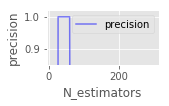

In [56]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

# n_estimators 

fact = []
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 290 )]

for i in tqdm(n_estimators):
    print(i)
    gb = GradientBoostingClassifier(random_state=48, n_estimators=i) 
    gb.fit(X_train, y_train)
    y_score = gb.predict(X_test)
    print(y_score)
    print(y_test)
    a = precision_score(y_test, y_score)
    fact.append(a)
    
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(n_estimators, fact, alpha=0.5, color='blue', label='precision')
ax.legend(loc='best')
ax.set_ylim([0.85,1.02])
ax.set_ylabel("precision")
ax.set_xlabel("N_estimators")
        
print("Best precision_score is {:.3f}% with {} trees".format(max(fact), n_estimators[np.argmax(fact)]))

In [57]:
# max_depth

fact = []
max_depth_grid = [int(x) for x in np.linspace(1, 200, num = 200)]

for max_depth in tqdm(max_depth_grid):
    gb = GradientBoostingClassifier(n_estimators=27, random_state=42, max_depth=max_depth)
    gb.fit(X_train, y_train)
    y_score = gb.predict(X_test)
    print(y_score)
    print(y_test)
    a = precision_score(y_test, y_score)
    fact.append(a)

print("Best precision is {:.2f}% with {} max_depth".format(max(fact), 
                                                        max_depth_grid[np.argmax(fact)]))


  0%|          | 0/200 [00:00<?, ?it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


C:\Users\1\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  1%|          | 2/200 [00:00<00:19, 10.10it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  2%|▏         | 3/200 [00:00<00:23,  8.50it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  2%|▏         | 4/200 [00:00<00:31,  6.18it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  2%|▎         | 5/200 [00:01<00:57,  3.41it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  3%|▎         | 6/200 [00:01<00:56,  3.41it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  4%|▎         | 7/200 [00:01<01:04,  3.01it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  4%|▍         | 8/200 [00:02<01:38,  1.94it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  4%|▍         | 9/200 [00:03<02:02,  1.57it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  5%|▌         | 10/200 [00:05<02:49,  1.12it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  6%|▌         | 11/200 [00:07<03:37,  1.15s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  6%|▌         | 12/200 [00:09<04:53,  1.56s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  6%|▋         | 13/200 [00:12<06:12,  1.99s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  7%|▋         | 14/200 [00:16<08:14,  2.66s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 15/200 [00:20<09:31,  3.09s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 16/200 [00:24<10:22,  3.38s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  8%|▊         | 17/200 [00:29<11:13,  3.68s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


  9%|▉         | 18/200 [00:33<11:25,  3.77s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|▉         | 19/200 [00:37<11:46,  3.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|█         | 20/200 [00:41<11:55,  3.98s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 10%|█         | 21/200 [00:45<12:05,  4.05s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 11%|█         | 22/200 [00:49<11:51,  4.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▏        | 23/200 [00:53<11:29,  3.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▏        | 24/200 [00:56<11:05,  3.78s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 12%|█▎        | 25/200 [01:00<10:58,  3.77s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 13%|█▎        | 26/200 [01:04<11:07,  3.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▎        | 27/200 [01:08<10:55,  3.79s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▍        | 28/200 [01:11<10:36,  3.70s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 14%|█▍        | 29/200 [01:15<10:19,  3.62s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 15%|█▌        | 30/200 [01:19<10:27,  3.69s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▌        | 31/200 [01:22<10:12,  3.62s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▌        | 32/200 [01:25<09:41,  3.46s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 16%|█▋        | 33/200 [01:29<09:36,  3.45s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 17%|█▋        | 34/200 [01:32<09:42,  3.51s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 35/200 [01:36<09:53,  3.60s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 36/200 [01:40<09:44,  3.56s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 18%|█▊        | 37/200 [01:43<09:40,  3.56s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 19%|█▉        | 38/200 [01:46<09:09,  3.39s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|█▉        | 39/200 [01:50<09:37,  3.59s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|██        | 40/200 [01:54<09:43,  3.65s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 20%|██        | 41/200 [01:58<09:52,  3.73s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 21%|██        | 42/200 [02:01<09:20,  3.55s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▏       | 43/200 [02:05<09:26,  3.61s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▏       | 44/200 [02:10<10:23,  4.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 22%|██▎       | 45/200 [02:14<10:31,  4.07s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 23%|██▎       | 46/200 [02:17<09:59,  3.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▎       | 47/200 [02:21<09:47,  3.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▍       | 48/200 [02:25<09:59,  3.94s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 24%|██▍       | 49/200 [02:29<09:49,  3.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 25%|██▌       | 50/200 [02:33<09:29,  3.80s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▌       | 51/200 [02:36<09:08,  3.68s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▌       | 52/200 [02:40<09:16,  3.76s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 26%|██▋       | 53/200 [02:43<08:26,  3.45s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 27%|██▋       | 54/200 [02:44<07:06,  2.92s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 55/200 [02:46<06:22,  2.64s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 56/200 [02:49<06:10,  2.57s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 28%|██▊       | 57/200 [02:51<05:41,  2.39s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 29%|██▉       | 58/200 [02:53<05:19,  2.25s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|██▉       | 59/200 [02:55<05:08,  2.19s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|███       | 60/200 [02:57<04:58,  2.13s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 30%|███       | 61/200 [02:59<04:52,  2.10s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 31%|███       | 62/200 [03:01<04:40,  2.03s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▏      | 63/200 [03:03<04:58,  2.18s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▏      | 64/200 [03:05<04:42,  2.08s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 32%|███▎      | 65/200 [03:07<04:45,  2.12s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 33%|███▎      | 66/200 [03:09<04:48,  2.15s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▎      | 67/200 [03:11<04:30,  2.03s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▍      | 68/200 [03:13<04:17,  1.95s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 34%|███▍      | 69/200 [03:16<05:05,  2.34s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 35%|███▌      | 70/200 [03:19<05:07,  2.37s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▌      | 71/200 [03:21<04:49,  2.25s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▌      | 72/200 [03:22<04:28,  2.10s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 36%|███▋      | 73/200 [03:24<04:19,  2.04s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 37%|███▋      | 74/200 [03:26<04:11,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 75/200 [03:28<03:59,  1.92s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 76/200 [03:30<03:50,  1.86s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 38%|███▊      | 77/200 [03:31<03:45,  1.83s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 39%|███▉      | 78/200 [03:33<03:42,  1.83s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|███▉      | 79/200 [03:36<04:04,  2.02s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|████      | 80/200 [03:38<03:58,  1.99s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 40%|████      | 81/200 [03:39<03:46,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 41%|████      | 82/200 [03:41<03:56,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▏     | 83/200 [03:43<03:43,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▏     | 84/200 [03:45<03:33,  1.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 42%|████▎     | 85/200 [03:47<03:33,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 43%|████▎     | 86/200 [03:48<03:25,  1.80s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▎     | 87/200 [03:50<03:19,  1.77s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▍     | 88/200 [03:52<03:16,  1.75s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 44%|████▍     | 89/200 [03:53<03:11,  1.72s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 45%|████▌     | 90/200 [03:55<03:08,  1.71s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▌     | 91/200 [03:57<03:17,  1.81s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▌     | 92/200 [03:59<03:20,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 46%|████▋     | 93/200 [04:01<03:30,  1.97s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 47%|████▋     | 94/200 [04:03<03:22,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 95/200 [04:05<03:30,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 96/200 [04:07<03:23,  1.96s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 48%|████▊     | 97/200 [04:10<03:34,  2.08s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 49%|████▉     | 98/200 [04:11<03:24,  2.01s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|████▉     | 99/200 [04:14<03:44,  2.22s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|█████     | 100/200 [04:16<03:37,  2.17s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 50%|█████     | 101/200 [04:18<03:27,  2.09s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 51%|█████     | 102/200 [04:20<03:20,  2.04s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▏    | 103/200 [04:23<03:39,  2.26s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▏    | 104/200 [04:26<03:53,  2.44s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 52%|█████▎    | 105/200 [04:28<03:39,  2.31s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 53%|█████▎    | 106/200 [04:30<03:33,  2.27s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 54%|█████▎    | 107/200 [04:32<03:19,  2.14s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 54%|█████▍    | 108/200 [04:34<03:15,  2.12s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 55%|█████▍    | 109/200 [04:36<03:06,  2.05s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 55%|█████▌    | 110/200 [04:38<03:11,  2.12s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▌    | 111/200 [04:40<03:02,  2.05s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▌    | 112/200 [04:42<02:53,  1.97s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 56%|█████▋    | 113/200 [04:44<02:54,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 57%|█████▋    | 114/200 [04:46<03:04,  2.14s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 57%|█████▊    | 115/200 [04:48<02:55,  2.07s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 58%|█████▊    | 116/200 [04:50<02:48,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 58%|█████▊    | 117/200 [04:52<02:43,  1.98s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 59%|█████▉    | 118/200 [04:54<02:38,  1.93s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|█████▉    | 119/200 [04:55<02:32,  1.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|██████    | 120/200 [04:57<02:35,  1.94s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 60%|██████    | 121/200 [04:59<02:29,  1.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 61%|██████    | 122/200 [05:03<03:07,  2.41s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▏   | 123/200 [05:05<03:00,  2.34s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▏   | 124/200 [05:07<02:46,  2.18s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 62%|██████▎   | 125/200 [05:09<02:34,  2.07s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 63%|██████▎   | 126/200 [05:10<02:26,  1.98s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▎   | 127/200 [05:12<02:20,  1.92s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▍   | 128/200 [05:14<02:19,  1.94s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 64%|██████▍   | 129/200 [05:17<02:36,  2.20s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 65%|██████▌   | 130/200 [05:19<02:35,  2.22s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▌   | 131/200 [05:21<02:22,  2.06s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▌   | 132/200 [05:23<02:13,  1.96s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 66%|██████▋   | 133/200 [05:24<02:05,  1.87s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 67%|██████▋   | 134/200 [05:26<02:01,  1.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 135/200 [05:28<02:01,  1.88s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 136/200 [05:30<01:59,  1.87s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 68%|██████▊   | 137/200 [05:32<01:55,  1.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 69%|██████▉   | 138/200 [05:34<01:58,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|██████▉   | 139/200 [05:36<01:54,  1.88s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|███████   | 140/200 [05:37<01:51,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 70%|███████   | 141/200 [05:39<01:53,  1.92s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 71%|███████   | 142/200 [05:41<01:48,  1.88s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▏  | 143/200 [05:43<01:48,  1.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▏  | 144/200 [05:45<01:46,  1.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 72%|███████▎  | 145/200 [05:47<01:43,  1.87s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 73%|███████▎  | 146/200 [05:49<01:48,  2.01s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▎  | 147/200 [05:51<01:48,  2.05s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▍  | 148/200 [05:53<01:44,  2.01s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 74%|███████▍  | 149/200 [05:55<01:39,  1.95s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 75%|███████▌  | 150/200 [05:57<01:37,  1.95s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▌  | 151/200 [05:59<01:33,  1.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▌  | 152/200 [06:01<01:30,  1.88s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 76%|███████▋  | 153/200 [06:02<01:26,  1.84s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 77%|███████▋  | 154/200 [06:04<01:25,  1.86s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 155/200 [06:06<01:24,  1.87s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 156/200 [06:08<01:21,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 78%|███████▊  | 157/200 [06:10<01:18,  1.82s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 79%|███████▉  | 158/200 [06:12<01:16,  1.81s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|███████▉  | 159/200 [06:13<01:14,  1.81s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|████████  | 160/200 [06:15<01:14,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 80%|████████  | 161/200 [06:17<01:10,  1.80s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 81%|████████  | 162/200 [06:19<01:11,  1.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▏ | 163/200 [06:22<01:18,  2.12s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▏ | 164/200 [06:24<01:14,  2.07s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 82%|████████▎ | 165/200 [06:26<01:10,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 83%|████████▎ | 166/200 [06:27<01:05,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▎ | 167/200 [06:29<01:04,  1.96s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▍ | 168/200 [06:31<01:04,  2.01s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 84%|████████▍ | 169/200 [06:34<01:08,  2.20s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 85%|████████▌ | 170/200 [06:36<01:03,  2.11s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▌ | 171/200 [06:38<01:02,  2.17s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▌ | 172/200 [06:40<00:58,  2.10s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 86%|████████▋ | 173/200 [06:42<00:54,  2.00s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 87%|████████▋ | 174/200 [06:44<00:50,  1.95s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 175/200 [06:46<00:46,  1.88s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 176/200 [06:47<00:45,  1.89s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 88%|████████▊ | 177/200 [06:49<00:42,  1.83s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 89%|████████▉ | 178/200 [06:51<00:39,  1.80s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|████████▉ | 179/200 [06:53<00:39,  1.86s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|█████████ | 180/200 [06:55<00:36,  1.85s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 90%|█████████ | 181/200 [06:57<00:37,  1.95s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 91%|█████████ | 182/200 [06:59<00:35,  1.96s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▏| 183/200 [07:02<00:37,  2.23s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▏| 184/200 [07:04<00:35,  2.20s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 92%|█████████▎| 185/200 [07:06<00:31,  2.13s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 93%|█████████▎| 186/200 [07:08<00:29,  2.11s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▎| 187/200 [07:11<00:29,  2.26s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▍| 188/200 [07:13<00:26,  2.18s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 94%|█████████▍| 189/200 [07:14<00:22,  2.04s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 95%|█████████▌| 190/200 [07:16<00:19,  1.98s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▌| 191/200 [07:18<00:17,  1.93s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▌| 192/200 [07:20<00:15,  1.92s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 96%|█████████▋| 193/200 [07:22<00:13,  1.94s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 97%|█████████▋| 194/200 [07:24<00:11,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 195/200 [07:26<00:09,  1.99s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 196/200 [07:28<00:08,  2.02s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 98%|█████████▊| 197/200 [07:30<00:05,  1.97s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


 99%|█████████▉| 198/200 [07:32<00:03,  1.91s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


100%|█████████▉| 199/200 [07:33<00:01,  1.90s/it]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


100%|██████████| 200/200 [07:35<00:00,  1.88s/it]


Best precision is 1.00% with 3 max_depth


100%|██████████| 100/100 [01:17<00:00,  1.87s/it]


Best accuracy is 0.9160% with 91 n_estimators


Text(0.5,0,'N_estimators')

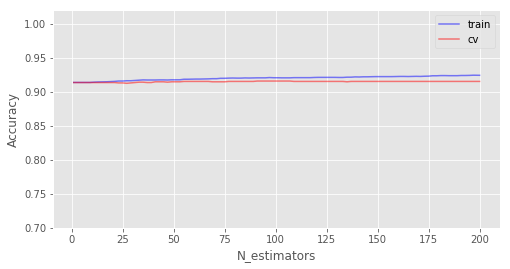

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

train_acc = []
test_acc = []

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 100 )]

for i in tqdm(n_estimators):
    gb = GradientBoostingClassifier(random_state=48, n_estimators=i) 
    gb.fit(X_train, y_train)
    
    train_acc.append(gb.score(X_train, y_train))
    test_acc.append(gb.score(X_test, y_test))
    
train_acc, test_acc  = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy is {:.4f}% with {} n_estimators".format(max(test_acc), 
                                                        n_estimators[np.argmax(test_acc)]))

plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n_estimators, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(n_estimators, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.70,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")


100%|██████████| 150/150 [17:57<00:00,  5.82s/it]


Best accuracy is 0.92% with 3 max_depth


Text(0.5,0,'Min_samples_leaf')

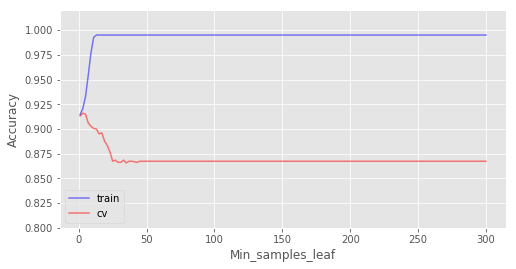

In [11]:
# max_depth

train_acc = []
test_acc = []
max_depth_grid = [int(x) for x in np.linspace(1, 300, num = 150)]

for max_depth in tqdm(max_depth_grid):
    gb = GradientBoostingClassifier(n_estimators=91, random_state=42, max_depth=max_depth)
    gb.fit(X_train, y_train)
    train_acc.append(gb.score(X_train, y_train))
    test_acc.append(gb.score(X_test, y_test))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy is {:.2f}% with {} max_depth".format(max(test_acc), 
                                                        max_depth_grid[np.argmax(test_acc)]))



fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.80,1.02])

ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

In [35]:
gb = GradientBoostingClassifier(n_estimators = 91, max_depth = 3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


print('Правильность на обучающем наборе: {:.3f}'.format(gb.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gb.score(X_test, y_test)))
print('Точность на тестовом наборе: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Полнота на обучающем наборе: {:.3f}'.format(recall_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.921
Правильность на тестовом наборе: 0.916
Точность на обучающем наборе: 0.833
Полнота на обучающем наборе: 0.032


In [13]:
gb = GradientBoostingClassifier(n_estimators = 91, max_depth = 3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


print('Правильность на обучающем наборе: {:.3f}'.format(gb.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gb.score(X_test, y_test)))
print('Точность на тестовом наборе: {:.3f}'.format(precision_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.921
Правильность на тестовом наборе: 0.916
Точность на обучающем наборе: 0.833


In [11]:
print(u'Правильность на обучающем наборе: 0.921')
print(u'Правильность на тестовом наборе: 0.916' )
print(u'Точность на тестовом наборе: 0.833')

Правильность на обучающем наборе: 0.921
Правильность на тестовом наборе: 0.916
Точность на тестовом наборе: 0.833


In [10]:
print(u'Правильность на обучающем наборе:')

Правильность на обучающем наборе:


In [25]:
precision_score(y_test, y_pred)

0.8333333333333334

In [18]:
roc_auc_score(y_pred,y_test)

0.8747920133111482

In [32]:
fpr, tpr, thresholds = roc_curve(y_pred, y_test)

In [33]:
fpr

array([0.        , 0.08374931, 1.        ])

In [34]:
tpr

array([0.        , 0.83333333, 1.        ])

In [23]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

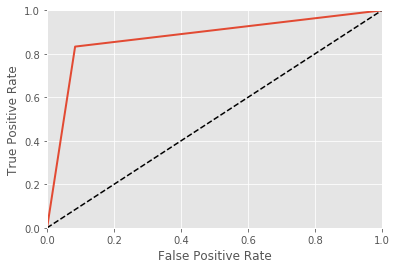

In [24]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)

cv = ShuffleSplit(n_splits=1, random_state=42)

pipe = Pipeline([('classifier', RandomForestClassifier())])

param_grid =[
    {'classifier': [RandomForestClassifier(random_state = 42, n_jobs =-1)],
     'classifier__n_estimators': [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)],
     'classifier__criterion': ['gini', 'entropy'], 
     'classifier__max_depth': [int(x) for x in np.linspace(start = 7, stop = 12, num = 6)] ,
     'classifier__max_features': [int(x) for x in np.linspace(start = 1, stop = 4, num = 4)] 
    },
    
    {'classifier': [GradientBoostingClassifier(random_state = 42)],
     'classifier__n_estimators': [int(x) for x in np.linspace(start = 120, stop = 135, num = 16)],
     'classifier__learning_rate':[0.1, 0.3, 0.5, 0.8, 1.0],
     'classifier__max_depth': [1,2,3,4]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, scoring = 'recall')
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя полнота для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Средняя полнота для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

In [48]:
GB = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=35,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [16]:
GB = GradientBoostingClassifier(max_depth=3, n_estimators=27, random_state=42)

In [5]:
ssd = pd.read_excel('C:/Users/1/Downloads/ssd.xlsx', index = False)

In [6]:
ssd

,com,ln,run,ex_scr,ex_dir
0,1,0.000000,95,10,9
1,4,1.386294,87,14,0
2,2,0.693147,91,7,0
3,1,0.000000,109,25,0
4,1,0.000000,90,3,6


In [13]:
ssd.loc[]

,com,ln,run,ex_scr,ex_dir
0,1,0.000000,95,10,9
1,4,1.386294,87,14,0
2,2,0.693147,91,7,0


In [17]:
scaler = StandardScaler()
scaler.fit(ssd)
X = scaler.transform(ssd)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
X

array([[-0.68599434, -0.75      ,  0.07756315, -0.23934139,  1.58113883],
       [ 1.88648444,  1.75      , -0.95661223,  0.29252836, -0.79056942],
       [ 0.17149859,  0.5       , -0.43952454, -0.6382437 , -0.79056942],
       [-0.68599434, -0.75      ,  1.88737007,  1.75517018, -0.79056942],
       [-0.68599434, -0.75      , -0.56879646, -1.17011345,  0.79056942]])

In [68]:
roc_auc_score(y_test, y_score)

0.5032894736842105

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [63]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

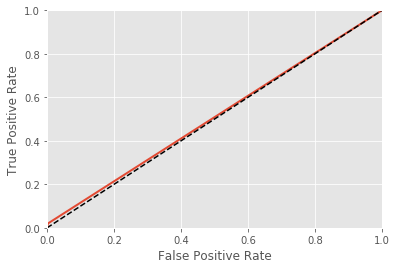

In [64]:
plot_roc_curve(fpr, tpr)
plt.show()